# 다중분류_모델개발후_서비스시_모델사용법_train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv('./data/wine_train.csv')
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [4]:
# 와인 종류를 구분하는 데이터 -> 와인 종류 3가지
data['와인_종류'].value_counts(normalize=True)

와인_종류
2    0.396226
1    0.330189
3    0.273585
Name: proportion, dtype: float64

In [7]:
# 결측치 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   106 non-null    int64  
 1   알코올_도수                  106 non-null    float64
 2   사과산_함량                  106 non-null    float64
 3   재_함량                    106 non-null    float64
 4   재의_알칼리도                 106 non-null    float64
 5   마그네슘_함량                 106 non-null    int64  
 6   총_페놀_함량                 106 non-null    float64
 7   플라보노이드_함량               106 non-null    float64
 8   비플라보노이드_페놀_함량           106 non-null    float64
 9   프로안토시아닌_함량              106 non-null    float64
 10  색_강도                    106 non-null    float64
 11  색조                      106 non-null    float64
 12  희석_와인의_투과율_OD280_OD315  106 non-null    float64
 13  프롤린_함량                  106 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.

<Axes: >

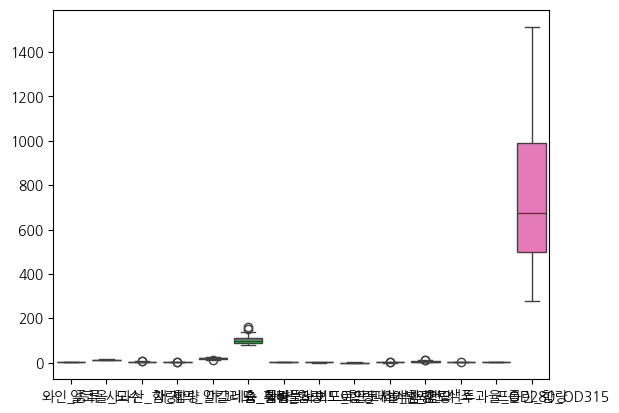

In [9]:
# 이상치 확인
sns.boxplot(data)

<Axes: >

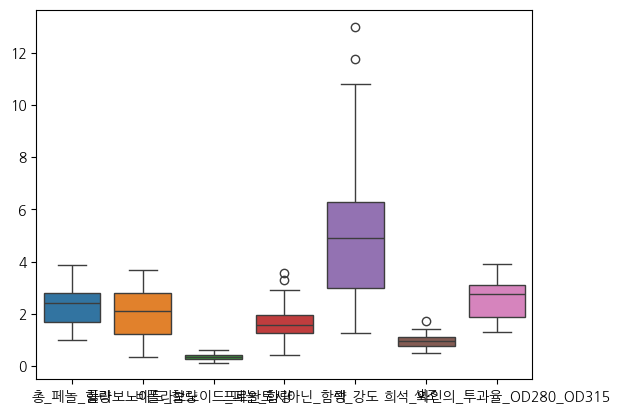

In [14]:
# 이상치 존재하지만 크게 영향을 줄 정도는 아니므로 상관 없음
sns.boxplot(data.iloc[:, 6:-1])

# 서비스에 해당 모델을 적용하여 사용하는 방법


In [40]:
from imblearn.over_sampling import SMOTE

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [57]:
mms = MinMaxScaler()
train_temp = mms.fit_transform(X_train)
test_temp = mms.transform(X_test)

mms_X_train = pd.DataFrame(train_temp, columns = X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(test_temp, columns = X_test.columns, index=X_test.index)


## mms 변수에 있는 MinMaxScaler 가중치 저장
### joblib : 버전에 따라 사용 가능
- joblib.dump(data, 경로/파일명)
- joblib.load(경로, 파일명)

In [80]:
import joblib

In [81]:
joblib.dump(mms, './model/MinMaxScaler_joblib.joblib')

['./model/MinMaxScaler_joblib.joblib']

In [82]:
mms_X_train.head()

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
77,0.476316,0.418033,0.672043,0.817073,0.217949,0.411538,0.034375,0.795918,0.136364,0.310580,0.333333,0.316602,0.252223
20,0.207895,0.163934,0.279570,0.542683,0.025641,0.480769,0.359375,0.469388,0.349650,0.066553,0.373984,0.428571,0.110752
24,0.644737,0.153689,0.688172,0.725610,0.064103,0.519231,0.190625,0.775510,0.653846,0.893345,0.073171,0.173745,0.276475
85,0.507895,0.518443,0.532258,0.481707,0.282051,0.053846,0.065625,0.530612,0.181818,0.341297,0.162602,0.162162,0.320938
32,0.684211,0.182377,0.720430,0.402439,0.358974,0.615385,0.756250,0.326531,0.363636,0.513652,0.650407,0.598456,0.834276


In [83]:
mms_X_test.head()

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
90,0.839474,0.159836,0.505376,0.347561,0.435897,0.750000,0.784375,0.244898,0.562937,0.435154,0.373984,0.764479,0.559418
31,0.471053,0.502049,0.505376,0.542683,0.051282,0.088462,0.053125,0.530612,0.192308,0.766212,0.195122,0.162162,0.329022
97,0.750000,0.844262,0.467742,0.573171,-0.051282,-0.103846,-0.046875,0.530612,0.090909,0.308874,0.081301,0.000000,0.110752
96,0.273684,0.254098,0.435484,0.634146,0.012821,0.519231,0.675000,0.469388,0.325175,0.126280,0.308943,0.752896,0.080841
12,0.310526,0.055328,0.209677,0.378049,0.858974,0.230769,0.246875,0.000000,0.727273,0.133959,0.650407,0.671815,0.355699


In [61]:
print(y_train.nunique())
print(y_test.nunique())

1    2
2    2
3    2
dtype: int64
3


In [62]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## 최고 성능의 모델 나올 때까지 구하기

In [67]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
y_test.shape[1]

3

In [69]:
X_test.shape[1]

13

In [74]:
model = Sequential()
model.add(Input(shape=(X_test.shape[1], )))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(y_test.shape[1], activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
import os

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5531 - loss: 1.7207 - val_accuracy: 0.5455 - val_loss: 1.1128
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5453 - loss: 1.4578 - val_accuracy: 0.6818 - val_loss: 0.5273
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6460 - loss: 0.8861 - val_accuracy: 0.9091 - val_loss: 0.2271
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7216 - loss: 0.6413 - val_accuracy: 1.0000 - val_loss: 0.0959
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8388 - loss: 0.4096 - val_accuracy: 1.0000 - val_loss: 0.0593
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8701 - loss: 0.2347 - val_accuracy: 1.0000 - val_loss: 0.0692
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9078 - loss: 0.2083 - val_accuracy: 0.9545 - val_loss: 0.1023
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9434 - loss: 0.1490 - val_accuracy: 0.9545 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.9545 - val_loss: 0.0893
Epoch 102/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9545 - val_loss: 0.0905
Epoch 103/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9545 - val_loss: 0.0909
Epoch 104/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9545 - val_loss: 0.0902
Epoch 105/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9545 - val_loss: 0.0888


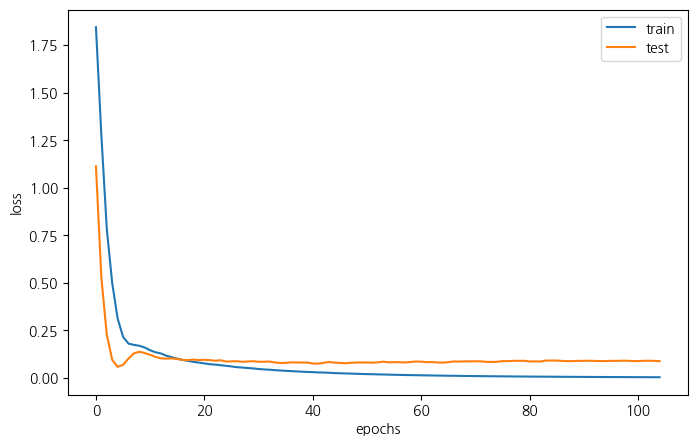

In [84]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# val_loss 개선이 연속 100 epoch 동안 안되면 학습 중단
# 과적합 방지 및 학습 시간 줄여줌
early_stop = EarlyStopping(patience=100)
# file_path = "./model/wine_{val_loss:.4f}_{epoch:04d}.keras"
file_path = "./model/wine_best_model.keras"
model_save = ModelCheckpoint(filepath=file_path, save_best_only=True)


history = model.fit(mms_X_train, y_train,epochs=1000,batch_size=16,validation_data=(mms_X_test, y_test),callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'])
plt.show()


# 머신러닝 스케일러와 모델 저장


In [87]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=42)
rfc.fit(mms_X_train, y_train)
pred = rfc.predict(mms_X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.92      0.96        13
           3       0.90      1.00      0.95         9

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [92]:
joblib.dump(rfc, "./model/rfc_model.joblib")

['./model/rfc_model.joblib']